## Discussion On Outlier And Its Impacts On Machine Learning 

#### Which Machine Learning Models are Sensitive to Outliers?
1. Naive Bayes Classifier --- Not Sensitive to Outliers
2. SVM --- Not Sensitive to Outliers
3. Linear Regression --- Sensitive to Outliers
4. Logistic Regression --- Sensitive to Outliers
5. Decision Tree Regressor or Classifier --- Not Sensitive
6. Ensemble (RF, XGBoost, GB) --- Not Sensitive
7. KNN --- Not Sensitive
8. KMean --- Sensitive
9. Hierarichal --- Sensitive
10. PCA --- Sensitive
11. Neural Networks --- Sensitive

In [1]:
import pandas as pd 

In [2]:
df = pd.read_csv("Datasets/titanic.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df['Age'].isnull().sum()

177

In [6]:
import seaborn as sns

C:\Users\Yash\AppData\Local\Temp\ipykernel_7056\3255828239.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

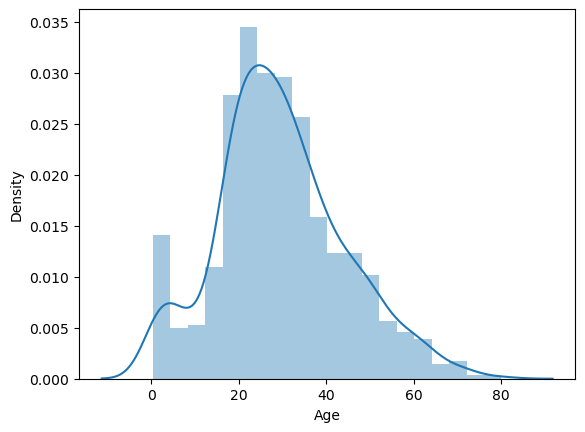

In [8]:
sns.distplot(df['Age'])

C:\Users\Yash\AppData\Local\Temp\ipykernel_7056\827162487.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'].fillna(100))


<Axes: xlabel='Age', ylabel='Density'>

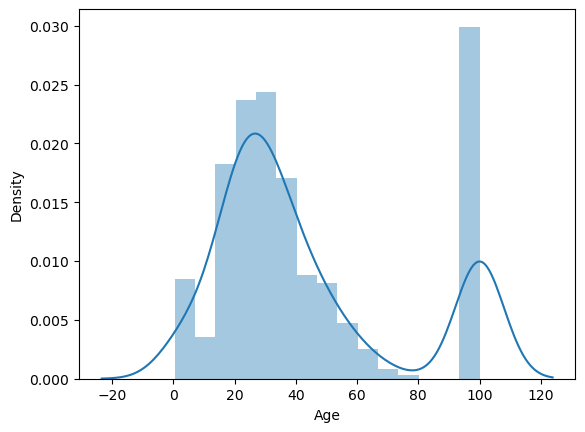

In [ ]:
sns.distplot(df['Age'].fillna(100)) ## Added 100 on place of null which will work like outlier

Text(0, 0.5, 'No of Passengers')

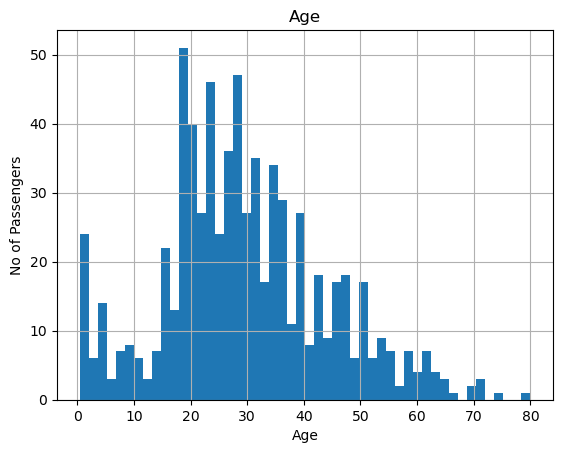

In [11]:
figure = df.Age.hist(bins=50)
figure.set_title("Age")
figure.set_xlabel("Age")
figure.set_ylabel("No of Passengers")

- Here the distribution of Age feature is *Gaussian Distribution*

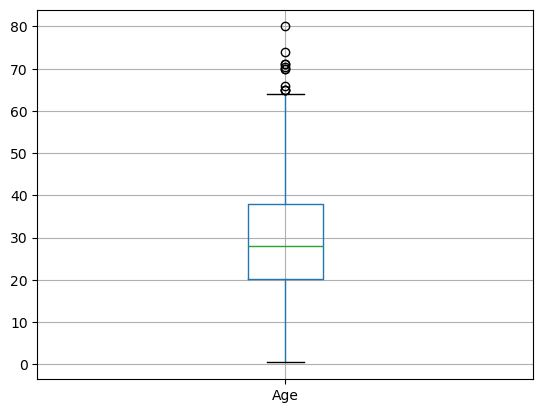

In [12]:
figure = df.boxplot(column='Age')

In [13]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [14]:
##### Assuming Age follows a Gaussian Distribution we will calculate the boundries which differentiates the outliers

upper_bound = df['Age'].mean() + 3*df['Age'].std()
lower_bound = df['Age'].mean() - 3*df['Age'].std()

In [15]:
print("Lowe Bound:",lower_bound)
print("Upper Bound:",upper_bound)

Lowe Bound: -13.88037434994331
Upper Bound: 73.27860964406095


In [16]:
## Let's compute the Interquartile range to calculate the boundries
IQR = df.Age.quantile(0.75) - df.Age.quantile(0.25)
print("IQR:",IQR)

IQR: 17.875


In [17]:
lower_bridge = df['Age'].quantile(0.25) - 1.5*IQR
upper_bridge = df['Age'].quantile(0.75) + 1.5*IQR
print("Lower Bridge:",lower_bridge)
print("Upper Bridge:",upper_bridge)

Lower Bridge: -6.6875
Upper Bridge: 64.8125


In [18]:
### In case of Extreme Outliers--->
lower_bridge_extreme = df['Age'].quantile(0.25) - 3*IQR
upper_bridge_extreme = df['Age'].quantile(0.75) + 3*IQR
print("Lower Bridge:",lower_bridge_extreme)
print("Upper Bridge:",upper_bridge_extreme)

Lower Bridge: -33.5
Upper Bridge: 91.625


Text(0, 0.5, 'No of Passengers')

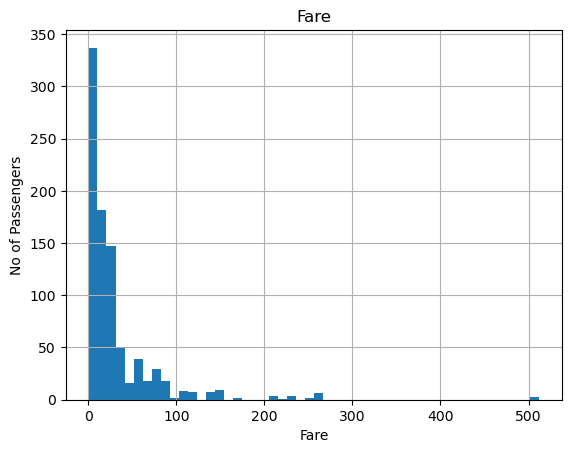

In [19]:
figure = df.Fare.hist(bins=50)
figure.set_title("Fare")
figure.set_xlabel("Fare")
figure.set_ylabel("No of Passengers")

- The distribution here is skewed it is not normal...

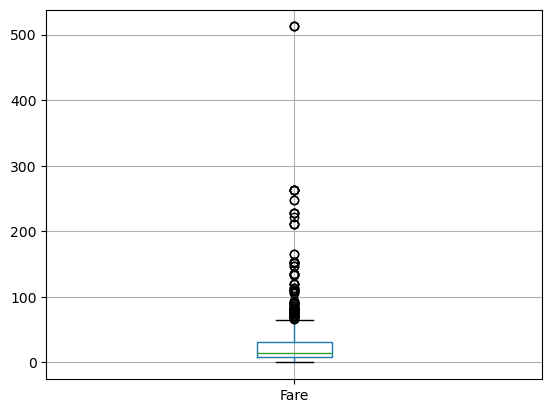

In [20]:
figure = df.boxplot(column="Fare")

In [21]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [22]:
## Let's compute the Interquartile range to calculate the boundries for "Fare" feature
IQR = df.Fare.quantile(0.75) - df.Fare.quantile(0.25)
print("IQR:",IQR)

IQR: 23.0896


In [23]:
lower_bridge = df['Fare'].quantile(0.25) - 1.5*IQR
upper_bridge = df['Fare'].quantile(0.75) + 1.5*IQR
print("Lower Bridge:",lower_bridge)
print("Upper Bridge:",upper_bridge)

## For "Fare" feature

Lower Bridge: -26.724
Upper Bridge: 65.6344


In [24]:
 ### In case of Extreme Outliers---> for Fare feature
lower_bridge_extreme = df['Fare'].quantile(0.25) - 3*IQR
upper_bridge_extreme = df['Fare'].quantile(0.75) + 3*IQR
print("Lower Bridge:",lower_bridge_extreme)
print("Upper Bridge:",upper_bridge_extreme)

Lower Bridge: -61.358399999999996
Upper Bridge: 100.2688


In [29]:
data = df.copy()

In [30]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [31]:
data.loc[data['Age']>=73,'Age']=73

In [32]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [33]:
data.head(100)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,"Shorney, Mr. Charles Joseph",male,NaN,0,0,374910,8.0500,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,231919,23.0000,NaN,S


In [35]:
data.loc[data['Fare']>=100,'Fare']=100 ## Where Fare has value greater than 100 then replace by 100

Text(0, 0.5, 'No of Passengers')

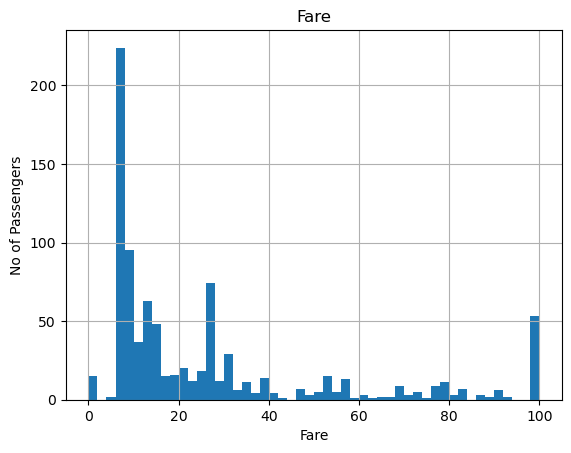

In [36]:
figure = data.Fare.hist(bins=50)
figure.set_title("Fare")
figure.set_xlabel("Fare")
figure.set_ylabel("No of Passengers")

Text(0, 0.5, 'No of Passengers')

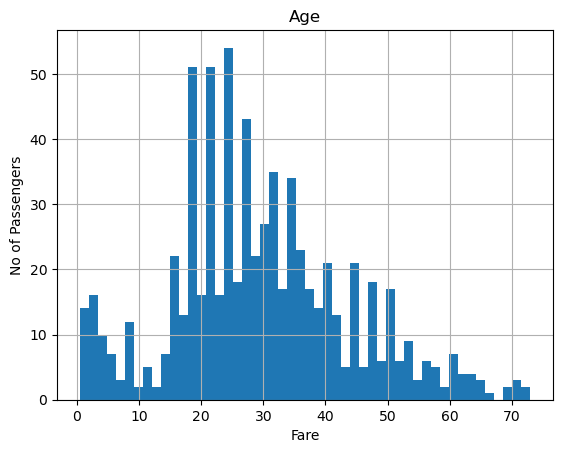

In [37]:
figure = data.Age.hist(bins=50)
figure.set_title("Age")
figure.set_xlabel("Fare")
figure.set_ylabel("No of Passengers")

#### If features are skewed we use *IQR Technique* and if the distribution of feature is Normally Distributed then we apply *3 std Technique*.

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data[['Age','Fare']].fillna(0),data['Survived'],test_size=0.3)

In [ ]:
### Logistic Regression
from sklearn.linear_model import LogisticRegression
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train,y_train)

y_pred = logistic_reg.predict(X_test)
y_pred1 = logistic_reg.predict_proba(X_test)

from sklearn.metrics import accuracy_score,roc_auc_score
print("Accuracy Score:",accuracy_score(y_test,y_pred))
print("Roc Auc Scaore:",roc_auc_score(y_test,y_pred1[:,1]))

Accuracy Score: 0.6492537313432836
Roc Auc Score: 0.685619212962963


In [43]:
### Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)
y_pred1 = rf.predict_proba(X_test)

from sklearn.metrics import accuracy_score,roc_auc_score
print("Accuracy Score:",accuracy_score(y_test,y_pred))
print("Roc Auc Scaore:",roc_auc_score(y_test,y_pred1[:,1]))

Accuracy Score: 0.6865671641791045
Roc Auc Scaore: 0.7094907407407407
